## Curse of dimensionality

In [1]:
import numpy as np
import pandas as pd

# KNN Curse of Dimensionality
import random, math

In [14]:
# The following code generates random numbers between zero and one from uniform
# distribution with the given dimension, which is equivalent of length of array or list:
def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)] # np.random.rand(5)

In [15]:
# The following function calculates root mean sum of squares of Euclidean distances (2-norm)
# between points by taking the difference between points and sum the squares and finally
# takes square root of total distance:
def distance(v, w):
    vec_sub = [v_i - w_i for v_i, w_i in zip(v, w)]
    sum_of_sqrs= sum(v_i * v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)

In [16]:
# Both dimension and number of pairs are utilized for calculating the distances with the
# following code:
def random_distances_comparison(dimension, number_pairs):
    return [distance(random_point_gen(dimension), random_point_gen(dimension)) for _ in range(number_pairs)]

In [8]:
def mean(x):
    return sum(x) / len(x)

In [11]:
dimensions = range(1, 201, 5)

1 0.0011310312795327349 0.3304377974569266 0.003422826590169872
6 0.13408376385196982 0.9718366726979907 0.13796944241641917
11 0.6174961838009708 1.3428297800724869 0.4598469537722331
16 0.690723555518616 1.5916756747360146 0.43395998725253815
21 1.145299809744623 1.8606501665486392 0.6155374236034196
26 1.3491108338575342 2.05939278034058 0.655101273898037
31 1.5306814775223596 2.2575232751731726 0.6780357457909011
36 1.6495694595386121 2.4368760200852035 0.6769197308121306
41 1.8131615499536435 2.620080307069328 0.692025181465427
46 1.9887669978961435 2.7625945084356123 0.7198910270122604
51 2.079213166546753 2.89338869628594 0.7186083118440697
56 2.2542679491328115 3.04103478287079 0.7412831848653645
61 2.43171126047381 3.1837540168385114 0.7637874181273951
66 2.567853662815102 3.2946307081057804 0.7794056118330382
71 2.7064177084028915 3.4335738927751285 0.788221775013403
76 2.7550984355940185 3.5609023888328744 0.773707935447518
81 2.9832566405962075 3.6705963579722676 0.81274440

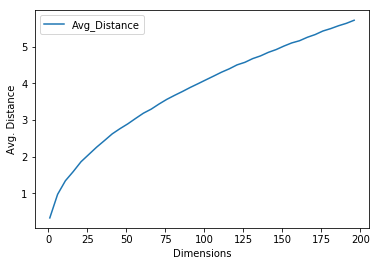

In [25]:
avg_distances = []
min_distances = []

dummyarray = np.empty((20, 4))
dist_vals = pd.DataFrame(dummyarray)
dist_vals.columns = ["Dimension", "Min_Distance", "Avg_Distance", "Min/Avg_Distance"]

random.seed(34)
i = 0
for dims in dimensions:
    distances = random_distances_comparison(dims, 1000)
    avg_distances.append(mean(distances))
    min_distances.append(min(distances))
    dist_vals.loc[i, 'Dimension'] = dims
    dist_vals.loc[i, 'Min_Distance'] = min(distances)
    dist_vals.loc[i, 'Avg_Distance'] = mean(distances)
    dist_vals.loc[i, 'Min/Avg_Distance'] = min(distances) / mean(distances)
    print(dims, min(distances), mean(distances), min(distances) *1.0/mean(distances))
    i = i + 1

# Plotting Average distances for Various Dimensions
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Dimensions')
plt.ylabel('Avg. Distance')
plt.plot(dist_vals['Dimension'], dist_vals['Avg_Distance'])
plt.legend(loc='best')
plt.show()

From the preceding graph, it is proved that with the increase in
dimensions, mean distance increases logarithmically. Hence the higher the
dimensions, the more data is needed to overcome the curse of
dimensionality!

In [26]:
dist_vals[:3]

,Dimension,Min_Distance,Avg_Distance,Min/Avg_Distance
0,1.0,0.001131,0.330438,0.003423
1,6.0,0.134084,0.971837,0.137969
2,11.0,0.617496,1.342830,0.459847


## Curse of dimensinality with 1D, 2D, and 3D example

In [28]:
np.random.rand(5, 1)

array([[0.7605233 ],
       [0.13091039],
       [0.89350484],
       [0.39174802],
       [0.83098259]])

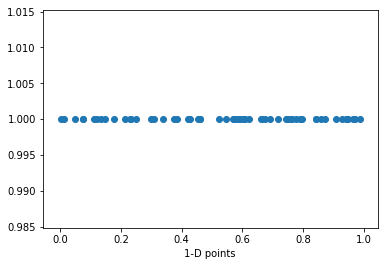

In [30]:
# 1-Dimension Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one_d_data = np.random.rand(60, 1)
one_d_data_df = pd.DataFrame(one_d_data)
one_d_data_df.columns = ['1D_Data']
one_d_data_df['height'] = 1

plt.figure()
plt.scatter(one_d_data_df['1D_Data'], one_d_data_df['height'])
plt.xlabel('1-D points')
plt.show()
# 60 Random Points Generated on 1-D

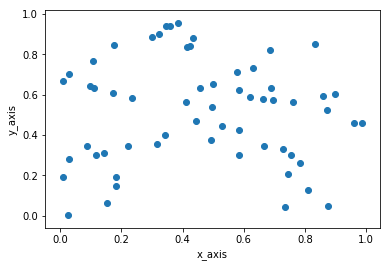

In [37]:
# 2 - Dimension Plot
two_d_data = np.random.rand(60, 2)
two_d_data_df = pd.DataFrame(two_d_data)
two_d_data_df.columns = ['x_axis', 'y_axis']

#plt.figure()
plt.scatter(two_d_data_df['x_axis'], two_d_data_df['y_axis'])
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.show()
# By observing the 2D graph we can see that more gaps have been appearing for the same 60 data points

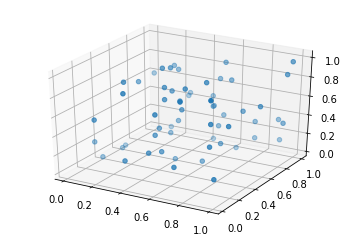

In [42]:
# 3-Dimension Plot
three_d_data = np.random.rand(60, 3)
three_d_data_df = pd.DataFrame(three_d_data)
three_d_data_df.columns = ['x_axis', 'y_axis', 'z_axis']

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_d_data_df['x_axis'], three_d_data_df['y_axis'], three_d_data_df['z_axis'])
plt.show()

Finally, 60 data points are drawn for 3D space. We can see the further increase in spaces,
which is very apparent. This has proven to us visually by now that with the increase in
dimensions, it creates lot of space, which makes a classifier weak to detect the signal:

In [ ]:
# References and credits to
# Statistics in Machine Learning